## Lecture 3 (Week 4): Plotting

Topic coverage: 

* Plotting with Matplotlib
    * Plotting basics review and extension
        - plot()
            - can use lists or arrays
            - format strings ('b--', 'g^', etc.)
            - automatically creates a figure if one doesn't exist
                - otherwise makes new 'axes' on active figure
        - figure()
            - used to make new figure and make existing ones active
                - e.g., figure(2) creates Figure 2, or makes Figure 2 active if it already exists.
        - subplot() and add_subplot()
            - for making subplots and adding subplots to figures
            - basic example of working with axes objects
                - (important, because most gallery examples make plots by using methods of axes objects)
                - adding plots to them
                - drawing things on them
                - getting and setting limits
        - matplotlib documentation and gallery
                
* Input/Output
    * Reading from the prompt
    * Reading from the command line
    * File input/output

    

## Rehash: lists vs arrays 

Any computing language defines more complex data structures, which aggregate individual data into a single container. 

The simplest such data structure is an **array**, which holds a fixed number of elements of a single type, usually in a contiguous region in memory. 
Individual array elements can be indexed; first index in Python and other C-like languages is 0
Arrays can be multi-dimensional, although they are always "unrolled" into a 1d structure in computer memory

Another sequential structure is a **linked list**, which is more dynamic, i.e. allows one to insert, remove, and append elements with little overhead.


Third common structure is a **dictionary**, which is often implemented as a **hash table** (e.g. in Python) or a **tree** (e.g. in C++ STL)

*(remember notes on the board last week)*


In [1]:
import numpy as np
a = np.array([1,2,3,4,5])
print (a[0],a[4])
for i in a:
    print (i)

1 5
1
2
3
4
5


In [2]:
print (len(a))   # how long is an array ? 

5


In [3]:
m = np.ndarray(shape=(3,3),dtype=float)  # unitialized array
print (m)
m[:,:] = 0
m += 5   # take current values of m, increment by 5
m[1:3,2] = 10
print (m)

[[  0.00000000e+000  -1.72723382e-077   2.25442626e-314]
 [  2.25439565e-314   2.25441832e-314   2.17756511e-314]
 [  2.17739383e-314   0.00000000e+000   2.13063156e-314]]
[[  5.   5.   5.]
 [  5.   5.  10.]
 [  5.   5.  10.]]


More on matrix operations in Week 12, when we discuss linear algebra

In [5]:
v = np.array([1,2,3])
w = np.array([-3,3,-1])
print (v*w)  
print (v.dot(w))     # now we can do linear algebra !

[-3  6 -3]
0


In [7]:
l = [2,4,5,'Apple']
print (l)

[2, 4, 5, 'Apple']


## Plotting with Matplotlib

Matplotlib provides an interface, and a set of convenient tools for graphing (2-dimensional, i.e. a graph with 2 axes, as well as 3-dimensional). The interface and appearance of the plots are deliberately made to resemble Matlab. One could argue with this aesthetic choice, but the interface makes it much easier for users used to Matlab to transition to Python (and vice versa!)

Let's look at an example

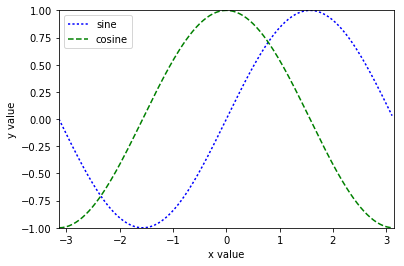

In [8]:
from pylab import * # import all functions from numpy, scipy, and matplotlib. Beware ! Overloads functions like sqrt, sin

# make plots inline
%matplotlib inline
x = arange(-pi, pi, pi/100)   # create an array of x values
plot(x, sin(x), 'b:', label='sine' )   # plot arrays x and sin(x), in blue, solid line
plot(x, cos(x), 'g--', label='cosine' )
xlabel('x value' )
ylabel('y value' )
xlim(-pi, pi)
ylim(-1, 1)
legend(loc='upper left')
show()

Actually, plot is a very flexible command. Arguments can any sequential data types (e.g. lists), although internally they are converted into arrays. Attributes can be set on the command line or separately (see below). 

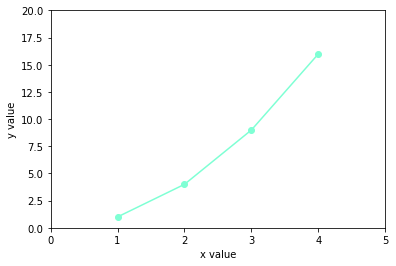

In [18]:
plot([1,2,3,4], [1,4,9,16], marker='o', color='aquamarine')
axis([0, 5, 0, 20])
xlabel('x value' )
ylabel('y value' )
show()

#### Line and marker attributes

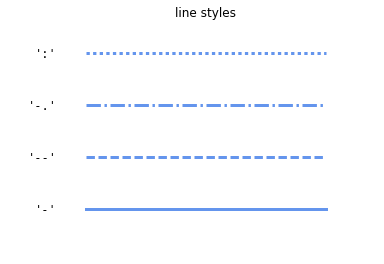

In [10]:
"""
Reference for line-styles included with Matplotlib (http://matplotlib.org/)
"""
import numpy as np
import matplotlib.pyplot as plt


color = 'cornflowerblue'
points = np.ones(5)  # Draw 5 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontdict={'family': 'monospace'})


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()


def nice_repr(text):
    return repr(text).lstrip('u')


# Plot all line styles.
f, ax = plt.subplots()

linestyles = ['-', '--', '-.', ':']
for y, linestyle in enumerate(linestyles):
    ax.text(-0.5, y, nice_repr(linestyle), **text_style)
    ax.plot(y * points, linestyle=linestyle, color=color, linewidth=3)
    format_axes(ax)
    ax.set_title('line styles')

plt.show()


#### Colors

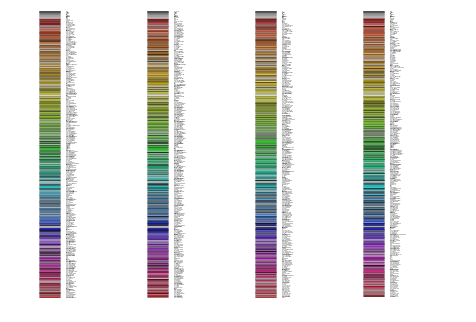

In [13]:
"""
Visualization of named colors (http://matplotlib.org/)

Simple plot example with the named colors and its visual representation.
"""

from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import six

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors


colors_ = list(six.iteritems(colors.cnames))

# Add the single letter colors.
for name, rgb in six.iteritems(colors.ColorConverter.colors):
    hex_ = colors.rgb2hex(rgb)
    colors_.append((name, hex_))

# Transform to hex color values.
hex_ = [color[1] for color in colors_]
# Get the rgb equivalent.
rgb = [colors.hex2color(color) for color in hex_]
# Get the hsv equivalent.
hsv = [colors.rgb_to_hsv(color) for color in rgb]

# Split the hsv values to sort.
hue = [color[0] for color in hsv]
sat = [color[1] for color in hsv]
val = [color[2] for color in hsv]

# Sort by hue, saturation and value.
ind = np.lexsort((val, sat, hue))
sorted_colors = [colors_[i] for i in ind]

n = len(sorted_colors)
ncols = 4
nrows = int(np.ceil(1. * n / ncols))

fig, ax = plt.subplots()

X, Y = fig.get_dpi() * fig.get_size_inches()

# row height
h = Y / (nrows + 1)
# col width
w = X / ncols

for i, (name, color) in enumerate(sorted_colors):
    col = i % ncols
    row = int(i / ncols)
    y = Y - (row * h) - h
    
    xi_line = w * (col + 0.05)
    xf_line = w * (col + 0.25)
    xi_text = w * (col + 0.3)

    ax.text(xi_text, y, name, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')

    # Add extra black line a little bit thicker to make
    # clear colors more visible.
    ax.hlines(y, xi_line, xf_line, color='black', linewidth=(h * 0.7))
    ax.hlines(y + h * 0.1, xi_line, xf_line, color=color, linewidth=(h * 0.6))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.show()


#### Markers

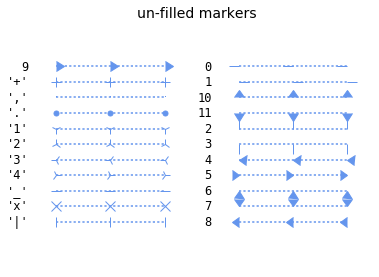

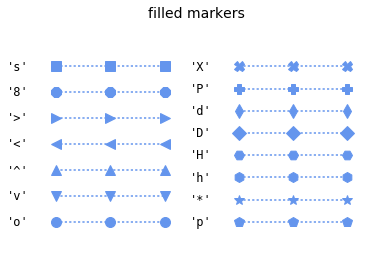

In [19]:
"""
Reference for filled- and unfilled-marker types included with Matplotlib.
"""
from six import iteritems
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


points = np.ones(3)  # Draw 3 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontdict={'family': 'monospace'})
marker_style = dict(linestyle=':', color='cornflowerblue', markersize=10)


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()


def nice_repr(text):
    return repr(text).lstrip('u')


def split_list(a_list):
    i_half = len(a_list) // 2
    return (a_list[:i_half], a_list[i_half:])


# Plot all un-filled markers
# --------------------------

fig, axes = plt.subplots(ncols=2)

# Filter out filled markers and marker settings that do nothing.
# We use iteritems from six to make sure that we get an iterator
# in both python 2 and 3
unfilled_markers = [m for m, func in iteritems(Line2D.markers)
                    if func != 'nothing' and m not in Line2D.filled_markers]
# Reverse-sort for pretty. We use our own sort key which is essentially
# a python3 compatible reimplementation of python2 sort.
unfilled_markers = sorted(unfilled_markers,
                          key=lambda x: (str(type(x)), str(x)))[::-1]
for ax, markers in zip(axes, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y * points, marker=marker, **marker_style)
        format_axes(ax)
fig.suptitle('un-filled markers', fontsize=14)


# Plot all filled markers.
# ------------------------

fig, axes = plt.subplots(ncols=2)
for ax, markers in zip(axes, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y * points, marker=marker, **marker_style)
        format_axes(ax)
fig.suptitle('filled markers', fontsize=14)

plt.show()


### Plots and subplots

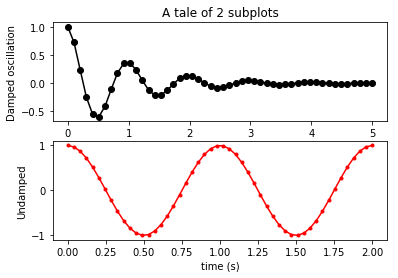

In [20]:
"""
Simple demo with multiple subplots.
"""
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
#plt.plot(x1, y1, 'ko-')
plt.plot(x1, y1, color='black', marker='o')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()


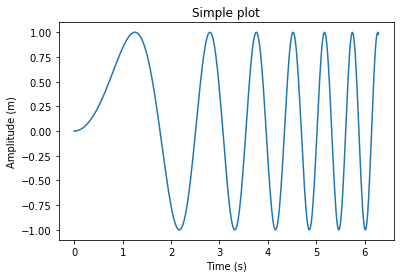

In [24]:
"""Examples illustrating the use of plt.subplots().

This function creates a figure and a grid of subplots with a single call, while
providing reasonable control over how the individual plots are created.  For
very refined tuning of subplot creation, you can still use add_subplot()
directly on a new figure.
"""

import matplotlib.pyplot as plt
import numpy as np

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

plt.close('all')

# Just a figure and one subplot
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (m)')
plt.show()


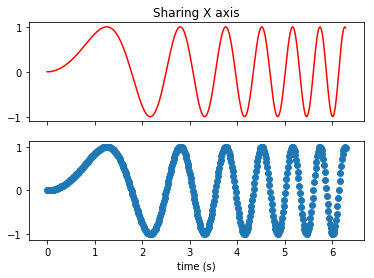

In [27]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y,'r')
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y)
axarr[1].set_xlabel('time (s)')
plt.show()

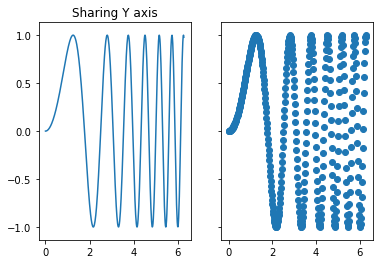

In [28]:
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

plt.show()


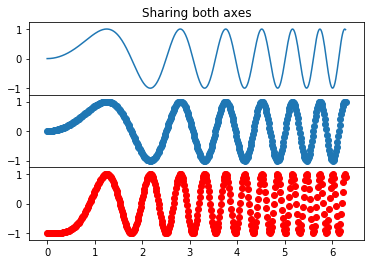

In [29]:
# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

plt.show()

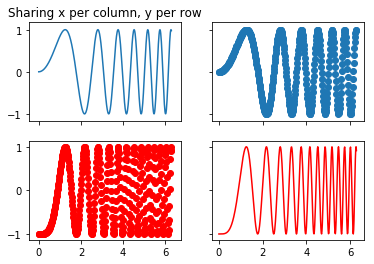

In [30]:
# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')

plt.show()

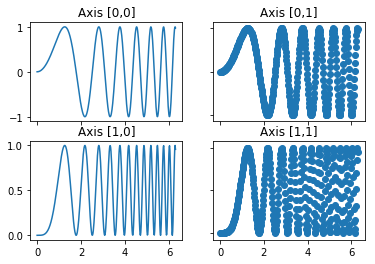

In [31]:
# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

plt.show()

### Histogramming 
This will be used extensively next week when we do statistics

[  89.54949522   94.7956283   100.04176137  105.28789445  110.53402752
  115.7801606   121.02629368  126.27242675  131.51855983  136.7646929
  142.01082598  147.25695906  152.50309213  157.74922521  162.99535828
  168.24149136  173.48762444  178.73375751  183.97989059  189.22602366
  194.47215674  199.71828982  204.96442289  210.21055597  215.45668904
  220.70282212  225.9489552   231.19508827  236.44122135  241.68735442
  246.9334875   252.17962058  257.42575365  262.67188673  267.9180198
  273.16415288  278.41028596  283.65641903  288.90255211  294.14868518
  299.39481826]


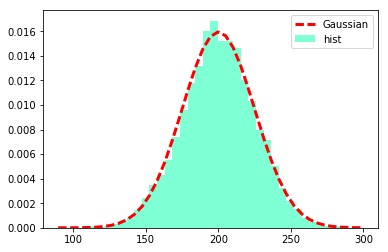

In [33]:
from pylab import *
%matplotlib inline

mu = 200
sigma = 25
x = mu + sigma*randn(10000)

n, bins, patches = hist(x, 40, normed=True, color='aquamarine')
print (bins)
l, = plot(bins, normpdf(bins, mu, sigma), 'r--', label='fit', linewidth=3)
foo = legend([l, patches[0]], ['Gaussian', 'hist'])


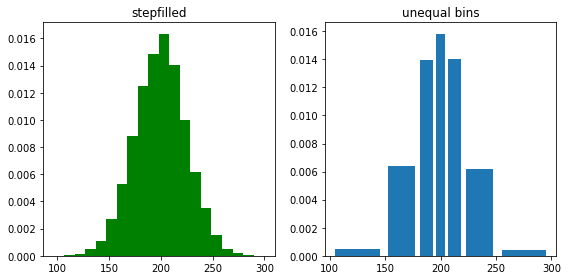

In [34]:
"""
Demo of the histogram (hist) function with different ``histtype`` settings.

* Histogram with step curve that has a color fill.
* Histogram with with unequal bin widths.

"""
import numpy as np
import matplotlib.pyplot as plt


mu = 200
sigma = 25
x = mu + sigma*np.random.randn(10000)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))

ax0.hist(x, 20, normed=1, histtype='stepfilled', facecolor='g')
ax0.set_title('stepfilled')

# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300]
ax1.hist(x, bins, normed=1, histtype='bar', rwidth=0.8)
ax1.set_title('unequal bins')

plt.tight_layout()
plt.show()


### For fun: 3d plotting

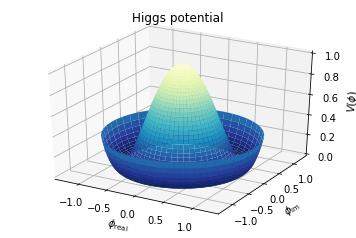

In [41]:
# By Armin Moser

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
step = 0.04
maxval = 1.0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create supporting points in polar coordinates
r = np.linspace(0,1.25,50)
p = np.linspace(0,2*np.pi,50)
R,P = np.meshgrid(r,p)
# transform them to cartesian system
X,Y = R*np.cos(P),R*np.sin(P)

#Z = ((R**2 - 1)**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.YlGnBu_r)
ax.set_zlim3d(0, 1)
ax.set_title('Higgs potential')
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')
plt.show()


### More information
We will cover plotting in this week's workshop. In the meantime, matplotlib is extensively documented:
http://matplotlib.org/
In particular, click on "Gallery" and "Examples", where much of this code has come from

## Input and Output

Most of the time, your code will need to process external data -- either entered by a human (through a keyboard), or read from external media. *This is an example abstraction*: you write generic code that is kept separately from the data. 

Let's look at some basic examples

#### Keyboard prompt

In [44]:
s = input('What is your name ? ')
print (type(s), "Hello,", s)

What is your name ? Joe
<class 'str'> Hello, Joe


You may want to convert strings to numerical types in order to perform calculations. See 

In [51]:
age = input('What is your age ? ')
print (type(age))
number = int(age)
print (type(number), number)

What is your age ? 10
<class 'str'>
<class 'int'> 10


Slightly more flexible (but also more dangerous) way to do conversion is to use <tt>eval()</tt>

In [56]:
x = 5
age = input('What is your age ? ')
number = eval(age)
print (type(number), number)

What is your age ? 10
<class 'int'> 10


Most often, you would want to enter several values and parse them. Use string method *split()*:
But pay attention: the parsing is pretty rudimantary ! (examples)

In [62]:
s = input('Enter coordinates (x,y,z):')
[x,y,z] = s.split(',')
print ("x=",x,"y=",y,"z=",z)
print (type(x), type(y), type(z))

Enter coordinates (x,y,z):10,11,-2
x= 10 y= 11 z= -2
<class 'str'> <class 'str'> <class 'str'>


Sometimes you would want to convert to float or int immediately, so can use list comprehension:

In [63]:
s = input('Enter coordinates (x,y,z):')
[x,y,z] = [float(var) for var in (s.split(','))]
print ("x=",x,"y=",y,"z=",z)
print (type(x), type(y), type(z))

Enter coordinates (x,y,z):10, 0, -1
x= 10.0 y= 0.0 z= -1.0
<class 'float'> <class 'float'> <class 'float'>


#### Formatted output

In [66]:
for x in range(1, 11):
    print (repr(x).rjust(2), repr(x*x).rjust(3),repr(x*x*x).rjust(4))    # right justification of strings

 1   1    1
 2   4    8
 3   9   27
 4  16   64
 5  25  125
 6  36  216
 7  49  343
 8  64  512
 9  81  729
10 100 1000


You can also zero-pad numbers, e.g. 

In [67]:
print ('-3.14'.zfill(7))

-003.14


In [68]:
import math
print ('The value of PI is approximately {0:07.3f}, but you can also output more digits: {1}'.format(math.pi,math.pi))

The value of PI is approximately 003.142, but you can also output more digits: 3.141592653589793


In [70]:
i = int(input('Enter integer: '))
print ('The hex representation of the integer is 0x{0:x}'.format(i))

Enter integer: 10
The hex representation of the integer is 0xa


For those of you familiar with C (and its *sprintf()* function), you can use old-style formating in python:

In [71]:
print ('The value of PI is approximately %7.3e.' % math.pi)
i = int(input('Enter integer: '))
print ('The hex representation of the integer is 0x%x' % i)

The value of PI is approximately 3.142e+00.
Enter integer: 120
The hex representation of the integer is 0x78


### Reading and writing files

Most often, you would want to read a large dataset, and would want to read it from an external medium. Simplest case is a file on your local disk. Use *open()* function. It returns a file object, and is most commonly used with two arguments: *open(filenamne,mode)*:

In [73]:
%ls

f = open('test.txt', 'w')
print (f)
f.write('Write a line\n')
f.write('Write another line\n')
f.write('Write a number here: ')
f.write(repr(1))
f.write('\n')   # end line (good practice)
f.close()

Discussion03.ipynb*                     Workshop03.ipynb*
H-H1_LOSC_16_V1-1126259446-32.hdf5*     Workshop03_withExerciseSolutions.html*
H-H1_LOSC_4_V1-1126259446-32.hdf5*      Workshop03_withExerciseSolutions.ipynb*
Homework03-solutions.ipynb*             l-l1_losc_4_v1-1126259446-32.hdf5*
Homework03.html*                        readligo.py*
Homework03.ipynb*                       readligo.pyc*
L-L1_LOSC_16_V1-1126259446-32.hdf5*     test.txt*
Lecture03.html*                         wind.data*
Lecture03.ipynb*                        wind.desc*
Workshop03.html*
<_io.TextIOWrapper name='test.txt' mode='w' encoding='US-ASCII'>


Most commonly, you would want to write columns of data:

In [74]:
import numpy as np
f = open('test.txt', 'w')
for x in np.arange(0,10,0.1):
    f.write('{0:f}\t {1:f}\t {2:f}\n'.format(x,x**2,x**3))
f.close()

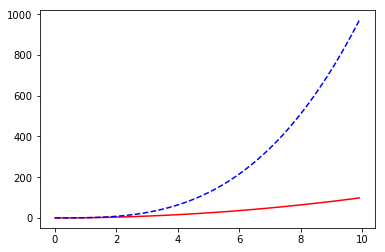

In [75]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x, x2, x3 = np.loadtxt('test.txt', unpack = True)
plt.plot(x,x2,'r-',x,x3,'b--')
plt.show()

There is also a more direct, less polished interface for reading data from a file:

In [76]:
f = open('test.txt', 'r')    # open file for reading
s = f.readline()             # read one line (including end-of-line character, '\n')
print (s)                      # print it

0.000000	 0.000000	 0.000000



In [77]:
s2 = f.readline()            # this will now read the second line
print (s2)

0.100000	 0.010000	 0.001000



In [94]:
f = open('test.txt', 'rb') # opening the file again will reset the handle to the beginning of the file.NB: binary mode !
f.seek(5)                  # skip 5 bytes (5 characters)
s2 = f.readline()          # read from that point until the end of the line
print (s2)                 # notice trancation 
f.seek(-10, 1)             # go back 10 bytes from the current position (i.e. beginning of next line)
s2 = f.readline()          # notice what is read
print (s2)

b'000\t 0.000000\t 0.000000\n'
b' 0.000000\n'
